In [5]:
# IMPORTAR LIBRERIAS
# Tratamiento de datos
import pandas as pd
import numpy as np

#Graficos
import matplotlib.pyplot as plt
import seaborn as sb

#Modelado
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Advertencias
import warnings
warnings.filterwarnings("ignore")

# PROBLEMA: Determinar si un estudiante recibe matricula de honor basado en las notas

matricula = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
                     0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
                     0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
                     0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
                     1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
                     1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
                     1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
                     0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
                     0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
                     0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
                     0, 0, 0, 0, 1, 0, 0, 0, 1, 1])
matematicas = np.array([41, 53, 54, 47, 57, 51, 42, 45, 54, 52, 51, 51, 71, 57, 50, 43,
                  51, 60, 62, 57, 35, 75, 45, 57, 45, 46, 66, 57, 49, 49, 57, 64,
                  63, 57, 50, 58, 75, 68, 44, 40, 41, 62, 57, 43, 48, 63, 39, 70,
                  63, 59, 61, 38, 61, 49, 73, 44, 42, 39, 55, 52, 45, 61, 39, 41,
                  50, 40, 60, 47, 59, 49, 46, 58, 71, 58, 46, 43, 54, 56, 46, 54,
                  57, 54, 71, 48, 40, 64, 51, 39, 40, 61, 66, 49, 65, 52, 46, 61,
                  72, 71, 40, 69, 64, 56, 49, 54, 53, 66, 67, 40, 46, 69, 40, 41,
                  57, 58, 57, 37, 55, 62, 64, 40, 50, 46, 53, 52, 45, 56, 45, 54,
                  56, 41, 54, 72, 56, 47, 49, 60, 54, 55, 33, 49, 43, 50, 52, 48,
                  58, 43, 41, 43, 46, 44, 43, 61, 40, 49, 56, 61, 50, 51, 42, 67,
                  53, 50, 51, 72, 48, 40, 53, 39, 63, 51, 45, 39, 42, 62, 44, 65,
                  63, 54, 45, 60, 49, 48, 57, 55, 66, 64, 55, 42, 56, 53, 41, 42,
                  53, 42, 60, 52, 38, 57, 58, 65])

In [6]:
#EXPLORACION DE DATOS
datos = pd.DataFrame({"Matematicas": matematicas,"Matricula":matricula})
datos.head(10)

,Matematicas,Matricula
0,41,0
1,53,0
2,54,0
3,47,0
4,57,0
5,51,0
6,42,0
7,45,0
8,54,0
9,52,0


In [8]:
#Balanceo de salida
datos.Matricula.value_counts().sort_index()

0    151
1     49
Name: Matricula, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

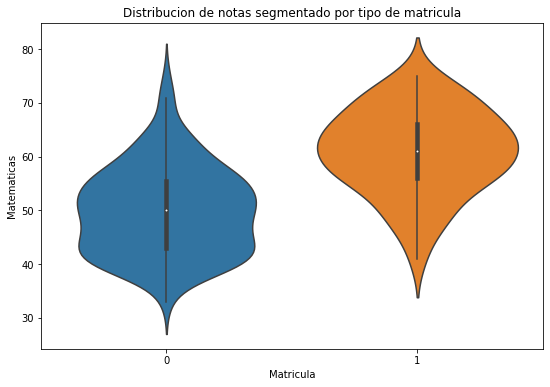

In [11]:
#Grafico de vionlin
fig, ax = plt.subplots(figsize = (9,6))
sb.violinplot(x = 'Matricula',
              y = 'Matematicas',
              data = datos,
              ax = ax)
ax.set_title('Distribucion de notas segmentado por tipo de matricula')
plt.show

In [12]:
#PREPARAR LOS DATOS
X = datos[['Matematicas']]
y = datos[['Matricula']]

In [13]:
XEntrenamiento, XPrueba, yEntrenamiento, yPrueba = train_test_split(X,y,train_size = 0.7, random_state = 123)

<function matplotlib.pyplot.show(close=None, block=None)>

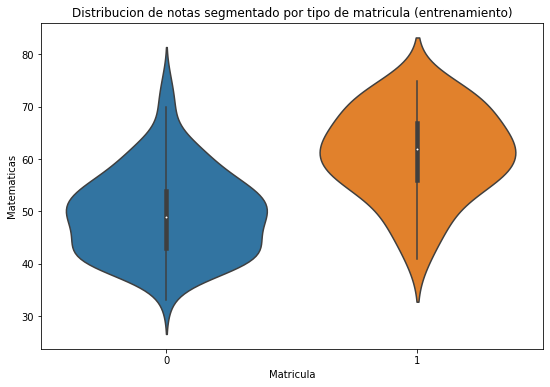

In [19]:
fig, ax = plt.subplots(figsize = (9,6))
sb.violinplot(x = yEntrenamiento['Matricula'],
              y = XEntrenamiento['Matematicas'],
              ax = ax)
ax.set_title('Distribucion de notas segmentado por tipo de matricula (entrenamiento)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

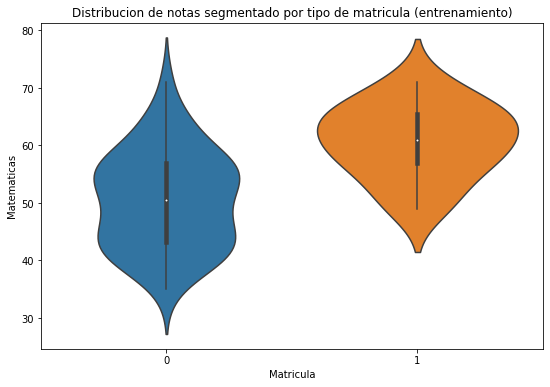

In [20]:
fig, ax = plt.subplots(figsize = (9,6))
sb.violinplot(x = yPrueba['Matricula'],
              y = XPrueba['Matematicas'],
              ax = ax)
ax.set_title('Distribucion de notas segmentado por tipo de matricula (entrenamiento)')
plt.show

In [21]:
#MODELADO
modelo = LogisticRegression()
modelo.fit(XEntrenamiento,yEntrenamiento)

LogisticRegression()

In [22]:
print('beta_0: ', modelo.intercept_)
print('beta_1: ', list(zip(X.columns, modelo.coef_.flatten())))

beta_0:  [-9.5220931]
beta_1:  [('Matematicas', 0.15251143403094547)]


In [23]:
predEntrenamiento = modelo.predict(XEntrenamiento)
desEntrenamiento = accuracy_score(yEntrenamiento,predEntrenamiento)
print(f'El desempeno en entrenamiento es: {desEntrenamiento}')

El desempeno en entrenamiento es: 0.8142857142857143


<Axes: >

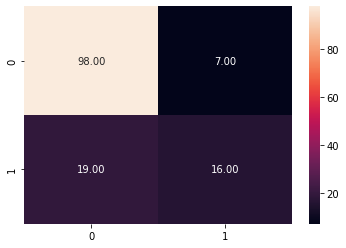

In [27]:
from seaborn.matrix import heatmap
matrizEntrenamiento = confusion_matrix(yEntrenamiento,predEntrenamiento)
sb.heatmap(matrizEntrenamiento,annot=True,fmt='.2f') #d,.2f,.nf

In [26]:
predPrueba = modelo.predict(XPrueba)
desPrueba = accuracy_score(yPrueba,predPrueba)
print(f'El desempeno en prueba es: {desPrueba}')


El desempeno en prueba es: 0.8


<Axes: >

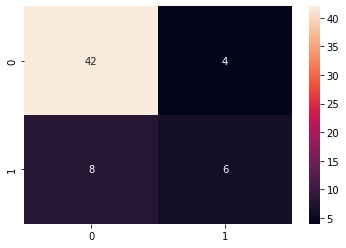

In [28]:
matrizPrueba = confusion_matrix(yPrueba,predPrueba)
sb.heatmap(matrizPrueba,annot=True,fmt='d')